In [1]:
import pandas as pd
import os
from pathlib import Path
import warnings
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


warnings.filterwarnings("ignore")


BASE_PATH = Path('.').resolve()

In [2]:
nome_csv = './data/Cópia de PEDE_PASSOS_DATASET_FIAP.csv'
dataset = pd.read_csv(nome_csv, sep=';')
dataset.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


## Exploração e limpeza dos dados

In [3]:
dataset.shape

(1349, 69)

In [4]:
dataset[dataset['NOME'] == 'ALUNO-824'].index

Index([823], dtype='int64')

In [5]:
dataset[dataset['NOME'] == 'ALUNO-824']

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
823,Escola Pública,ALUNO-824,10,1,1N,Não,7.751390666666667,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.25,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,NaN,Não,Não,5.888887,5.0,Fase 3 (7º e 8º ano)


In [6]:
index_to_drop = dataset[dataset['IDADE_ALUNO_2020'] == 'D108'].index

# Apagar a linha
dataset.drop(index_to_drop, inplace=True)

In [7]:
dataset.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [8]:
dataset[['IAN_2020']].value_counts()

IAN_2020
10          359
5           357
2.5          11
Name: count, dtype: int64

In [9]:
dataset.shape

(1348, 69)

In [10]:
dataset[['INDE_2021']] = dataset[['INDE_2021']].replace('#NULO!',np.nan)

In [11]:
colunas_para_converter = [ 'IDADE_ALUNO_2020', 'ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 
                           'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021' ]
# dataset[colunas_para_converter] = dataset[colunas_para_converter].replace('', np.nan)
# Converter as colunas especificadas para float64
dataset[colunas_para_converter] = dataset[colunas_para_converter].astype('float64')


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  727 non-null    object 
 1   NOME                           1348 non-null   object 
 2   IDADE_ALUNO_2020               727 non-null    float64
 3   ANOS_PM_2020                   727 non-null    float64
 4   FASE_TURMA_2020                727 non-null    object 
 5   PONTO_VIRADA_2020              701 non-null    object 
 6   INDE_2020                      727 non-null    float64
 7   INDE_CONCEITO_2020             727 non-null    object 
 8   PEDRA_2020                     727 non-null    object 
 9   DESTAQUE_IEG_2020              727 non-null    object 
 10  DESTAQUE_IDA_2020              727 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       727 non-null    float6

In [13]:
dataset['FASE_2020'] = dataset['FASE_TURMA_2020'].str[0]
dataset['TURMA_2020'] = dataset['FASE_TURMA_2020'].str[1:]
dataset['FASE_2020'] = dataset['FASE_2020'].astype(float)

In [14]:
dataset[['FASE_2020','FASE_2021', 'FASE_2022']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FASE_2020  727 non-null    float64
 1   FASE_2021  686 non-null    float64
 2   FASE_2022  862 non-null    float64
dtypes: float64(3)
memory usage: 42.1 KB


In [15]:
dataset = dataset[['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_2020', 'TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       'NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022',
       'IPP_2022', 'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022',
       'REC_AVA_4_2022', 'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022',
       'IPV_2022', 'IAN_2022', 'NIVEL_IDEAL_2022']]

In [16]:
df = dataset[['NOME', 'IDADE_ALUNO_2020','ANOS_PM_2020','SINALIZADOR_INGRESSANTE_2021','ANO_INGRESSO_2022',
       'FASE_2020', 'TURMA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'PONTO_VIRADA_2020',
       'INDE_2020', 'IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020', 'IPP_2020','IPV_2020', 'IAN_2020', 

       'FASE_2021','TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021','PONTO_VIRADA_2021', 
       'INDE_2021', 'IAA_2021','IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021', 
       'NIVEL_IDEAL_2021','DEFASAGEM_2021', 
       
       'FASE_2022', 'TURMA_2022','BOLSISTA_2022', 'PONTO_VIRADA_2022',
       'INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 'IAN_2022', 
       'NIVEL_IDEAL_2022',

       'NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022',
       'CG_2022', 'CF_2022', 'CT_2022']]
df.head()

,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,SINALIZADOR_INGRESSANTE_2021,ANO_INGRESSO_2022,FASE_2020,TURMA_2020,INSTITUICAO_ENSINO_ALUNO_2020,PONTO_VIRADA_2020,INDE_2020,...,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,CG_2022,CF_2022,CT_2022
0,ALUNO-1,11.0,2.0,Ingressante,NaN,2.0,H,Escola Pública,Não,7.883752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,2022.0,NaN,NaN,NaN,NaN,NaN,...,7.916665,5.0,Fase 2 (5º e 6º ano),8.200000,9.433333,NaN,2.0,245.0,66.0,6.0
2,ALUNO-3,12.0,2.0,Veterano,NaN,3.0,H,Escola Pública,Não,7.856390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-4,10.0,2.0,NaN,2022.0,1.0,D,Escola Pública,Não,5.076252,...,8.055553,5.0,Fase 3 (7º e 8º ano),5.000000,5.166667,NaN,3.0,451.0,69.0,3.0
4,ALUNO-5,10.0,1.0,Veterano,2019.0,2.0,M,Escola Pública,Não,8.077085,...,7.833337,5.0,Fase 3 (7º e 8º ano),6.666667,7.500000,NaN,3.0,415.0,61.0,12.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           1348 non-null   object 
 1   IDADE_ALUNO_2020               727 non-null    float64
 2   ANOS_PM_2020                   727 non-null    float64
 3   SINALIZADOR_INGRESSANTE_2021   686 non-null    object 
 4   ANO_INGRESSO_2022              862 non-null    float64
 5   FASE_2020                      727 non-null    float64
 6   TURMA_2020                     727 non-null    object 
 7   INSTITUICAO_ENSINO_ALUNO_2020  727 non-null    object 
 8   PONTO_VIRADA_2020              701 non-null    object 
 9   INDE_2020                      727 non-null    float64
 10  IAA_2020                       727 non-null    float64
 11  IEG_2020                       727 non-null    float64
 12  IPS_2020                       727 non-null    float6

In [18]:
df[df['FASE_2020'] == 8].info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 160 to 1317
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           24 non-null     object 
 1   IDADE_ALUNO_2020               24 non-null     float64
 2   ANOS_PM_2020                   24 non-null     float64
 3   SINALIZADOR_INGRESSANTE_2021   0 non-null      object 
 4   ANO_INGRESSO_2022              0 non-null      float64
 5   FASE_2020                      24 non-null     float64
 6   TURMA_2020                     24 non-null     object 
 7   INSTITUICAO_ENSINO_ALUNO_2020  24 non-null     object 
 8   PONTO_VIRADA_2020              0 non-null      object 
 9   INDE_2020                      24 non-null     float64
 10  IAA_2020                       24 non-null     float64
 11  IEG_2020                       24 non-null     float64
 12  IPS_2020                       24 non-null     float6

In [19]:
# Retirando Fase 8
df = df[df['FASE_2020'] !=8]

## Avaliação dos alunos que não saíram

In [20]:
df_hist = df.drop(columns=['IDADE_ALUNO_2020','ANOS_PM_2020','SINALIZADOR_INGRESSANTE_2021'])
df_hist = df_hist.dropna(subset=['FASE_2020','FASE_2021', 'FASE_2022'])
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 4 to 1347
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           314 non-null    object 
 1   ANO_INGRESSO_2022              314 non-null    float64
 2   FASE_2020                      314 non-null    float64
 3   TURMA_2020                     314 non-null    object 
 4   INSTITUICAO_ENSINO_ALUNO_2020  314 non-null    object 
 5   PONTO_VIRADA_2020              314 non-null    object 
 6   INDE_2020                      314 non-null    float64
 7   IAA_2020                       314 non-null    float64
 8   IEG_2020                       314 non-null    float64
 9   IPS_2020                       314 non-null    float64
 10  IDA_2020                       314 non-null    float64
 11  IPP_2020                       314 non-null    float64
 12  IPV_2020                       314 non-null    float64

In [21]:
df_hist[['NOME',
       'INDE_2020','INDE_2021','INDE_2022',
       'IDA_2020', 'IDA_2021','IDA_2022',
       'IEG_2020','IEG_2021','IEG_2022',
       'IAA_2020', 'IAA_2021','IAA_2022']].describe()

,INDE_2020,INDE_2021,INDE_2022,IDA_2020,IDA_2021,IDA_2022,IEG_2020,IEG_2021,IEG_2022,IAA_2020,IAA_2021,IAA_2022
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,7.716611,7.030892,6.968217,7.241773,5.733121,5.946851,8.500955,7.027389,7.725202,8.713657,8.204777,8.095554
std,0.957512,1.337567,1.106538,2.431599,2.156908,2.002024,1.570932,2.394632,1.783999,1.161212,2.193807,2.148467
min,4.328751,2.735000,3.031806,0.000000,0.000000,0.722222,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.285731,6.264000,6.340765,6.000000,4.600000,4.590278,8.000000,5.800000,6.671875,8.333340,7.900000,7.916670
50%,7.870697,7.301000,7.055601,7.666667,6.250000,6.161111,8.900000,7.500000,8.234071,9.000020,8.800000,8.500020
75%,8.355628,7.979750,7.735833,9.000000,7.300000,7.461111,9.700000,8.800000,9.076504,9.500020,9.500000,9.166680
max,9.712504,9.294000,9.441522,10.000000,9.500000,9.916667,10.000000,10.000000,10.000000,10.000020,10.000000,10.000020


In [22]:
df_hist[['NOME',
       'IPS_2020', 'IPS_2021','IPS_2022',
       'IPP_2020','IPP_2021', 'IPP_2022',
       'IPV_2020','IPV_2021','IPV_2022',
       'IAN_2020', 'IAN_2021', 'IAN_2022']].describe()

,IPS_2020,IPS_2021,IPS_2022,IPP_2020,IPP_2021,IPP_2022,IPV_2020,IPV_2021,IPV_2022,IAN_2020,IAN_2021,IAN_2022
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,6.767516,6.813057,6.636146,7.307756,7.689809,6.717921,7.683918,7.585032,7.275433,7.523885,6.934713,6.337580
std,1.465420,1.260479,1.212569,1.668244,0.925616,1.139420,1.118361,1.563767,1.207251,2.539509,2.499784,2.373453
min,2.500000,0.000000,3.750000,2.500000,2.500000,2.812500,2.583340,2.500000,3.750000,2.500000,2.500000,2.500000
25%,5.625000,6.300000,5.625000,7.109375,7.300000,6.041667,7.250000,6.800000,6.562498,5.000000,5.000000,5.000000
50%,7.500000,7.500000,7.500000,7.708333,7.700000,6.458333,7.750000,7.900000,7.444443,10.000000,5.000000,5.000000
75%,7.500000,7.500000,7.500000,8.125000,8.100000,7.500000,8.277782,8.700000,8.055556,10.000000,10.000000,10.000000
max,10.000000,8.800000,9.375000,10.000000,10.000000,9.218750,10.000010,10.000000,10.000010,10.000000,10.000000,10.000000


 - IPS: Sobe pouco e volta (6.767516	6.891685	6.747812)
 - IPP: Sobe e cai muito (7.307756	7.668490	6.563640)
 - IPV: Cai pouco e cai mais (7.683918	7.610284	7.283916)
 - IAN: Cai bastante (7.523885	6.974836	6.274617)

In [23]:
df_hist['BOLSISTA_2020'] = df_hist['INSTITUICAO_ENSINO_ALUNO_2020'].apply(lambda x: 0 if x == 'Escola Pública' else 1)
df_hist['BOLSISTA_2021'] = df_hist['INSTITUICAO_ENSINO_ALUNO_2021'].apply(lambda x: 0 if x == 'Escola Pública' else 1)
df_hist['BOLSISTA_2022'] = df_hist['BOLSISTA_2022'].apply(lambda x: 0 if x == 'Não' else 1)

In [24]:
df_hist = df_hist[['NOME', 'FASE_2020','FASE_2021','FASE_2022',
                   'BOLSISTA_2020','BOLSISTA_2021','BOLSISTA_2022',
                   'INDE_2020','INDE_2021','INDE_2022', 'IDA_2020','IDA_2021','IDA_2022', 
                   'IEG_2020','IEG_2021','IEG_2022','IAA_2020', 'IAA_2021','IAA_2022',
                   'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020', 'IPP_2021','IPP_2022',
                   'IPV_2020','IPV_2021','IPV_2022','IAN_2020', 'IAN_2021', 'IAN_2022']]
df_hist.columns

Index(['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'BOLSISTA_2020',
       'BOLSISTA_2021', 'BOLSISTA_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022',
       'IDA_2020', 'IDA_2021', 'IDA_2022', 'IEG_2020', 'IEG_2021', 'IEG_2022',
       'IAA_2020', 'IAA_2021', 'IAA_2022', 'IPS_2020', 'IPS_2021', 'IPS_2022',
       'IPP_2020', 'IPP_2021', 'IPP_2022', 'IPV_2020', 'IPV_2021', 'IPV_2022',
       'IAN_2020', 'IAN_2021', 'IAN_2022'],
      dtype='object')

### Perda de bolsa

In [25]:
# Perdeu bolsa em 2021
df_hist[(df_hist['BOLSISTA_2020'] == 1) & (df_hist['BOLSISTA_2021'] == 0)]#.to_csv('Perdeu a bolsa.csv')

,NOME,FASE_2020,FASE_2021,FASE_2022,BOLSISTA_2020,BOLSISTA_2021,BOLSISTA_2022,INDE_2020,INDE_2021,INDE_2022,...,IPS_2022,IPP_2020,IPP_2021,IPP_2022,IPV_2020,IPV_2021,IPV_2022,IAN_2020,IAN_2021,IAN_2022
742,ALUNO-743,0.0,1.0,1.0,1,0,0,7.993333,8.061,7.381391,...,5.625,2.5,7.9,5.833333,6.916655,8.7,7.77778,10.0,10.0,5.0


In [26]:
# Perderam bolsa em 2022
df_hist[(df_hist['BOLSISTA_2021'] == 1) & (df_hist['BOLSISTA_2022'] == 0)][['BOLSISTA_2020','FASE_2020','FASE_2021','FASE_2022','IDA_2020','IDA_2021','IDA_2022','IEG_2020','IEG_2021','IEG_2022','IAA_2020','IAA_2021','IAA_2022']]


,BOLSISTA_2020,FASE_2020,FASE_2021,FASE_2022,IDA_2020,IDA_2021,IDA_2022,IEG_2020,IEG_2021,IEG_2022,IAA_2020,IAA_2021,IAA_2022
59,1,5.0,6.0,7.0,6.666667,6.1,4.044444,9.7,7.5,4.129902,7.50000,7.9,8.33334
234,1,3.0,3.0,4.0,7.666667,6.6,5.677778,9.0,6.9,7.725859,8.33335,9.2,6.66666
871,1,2.0,3.0,3.0,6.000000,2.9,4.333333,8.1,2.2,5.727513,9.00002,6.7,7.08333
1092,1,5.0,6.0,7.0,5.333333,5.4,4.733333,9.1,7.2,7.370098,9.16668,7.9,7.91667


In [27]:
df_hist[(df_hist['BOLSISTA_2021'] == 1) & (df_hist['BOLSISTA_2022'] == 0)][['IPS_2020','IPS_2021','IPS_2022','IPP_2020','IPP_2021','IPP_2022','IPV_2020','IPV_2021','IPV_2022','IAN_2020','IAN_2021','IAN_2022']]


,IPS_2020,IPS_2021,IPS_2022,IPP_2020,IPP_2021,IPP_2022,IPV_2020,IPV_2021,IPV_2022,IAN_2020,IAN_2021,IAN_2022
59,6.875,6.9,5.625,8.437500,7.2,7.96875,8.124995,7.7,7.277773,5.0,5.0,5.0
234,7.500,5.6,6.875,7.500000,7.3,6.87500,7.291667,8.1,5.999993,10.0,10.0,10.0
871,4.375,5.0,5.625,7.500000,5.2,7.18750,7.944447,3.7,5.124990,5.0,10.0,5.0
1092,7.500,7.5,7.500,8.333333,8.0,8.28125,7.055553,6.8,8.055557,5.0,10.0,5.0


### Sempre teve bolsa

In [28]:
df_hist[(df_hist['BOLSISTA_2020'] == 1) & (df_hist['BOLSISTA_2021'] == 1) & (df_hist['BOLSISTA_2022'] == 1)].shape

(57, 31)

### Ganho de bolsa

In [29]:
df_hist.columns

Index(['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'BOLSISTA_2020',
       'BOLSISTA_2021', 'BOLSISTA_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022',
       'IDA_2020', 'IDA_2021', 'IDA_2022', 'IEG_2020', 'IEG_2021', 'IEG_2022',
       'IAA_2020', 'IAA_2021', 'IAA_2022', 'IPS_2020', 'IPS_2021', 'IPS_2022',
       'IPP_2020', 'IPP_2021', 'IPP_2022', 'IPV_2020', 'IPV_2021', 'IPV_2022',
       'IAN_2020', 'IAN_2021', 'IAN_2022'],
      dtype='object')

In [30]:
df_hist.shape

(314, 31)

In [31]:
ganhou_bolsa21 = df_hist[(df_hist['BOLSISTA_2020'] == 0) & (df_hist['BOLSISTA_2021'] == 1)]
ganhou_bolsa21.shape

(33, 31)

In [32]:
b20=0
b21=1
b22=1
df_hist[(df_hist['BOLSISTA_2020'] == b20) & (df_hist['BOLSISTA_2021'] == b21) & (df_hist['BOLSISTA_2022'] == b22)].shape

(33, 31)

In [33]:
df_hist[(df_hist['BOLSISTA_2022'] == 1) ].shape

(95, 31)

In [34]:
ganhou_bolsa21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 10 to 1347
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NOME           33 non-null     object 
 1   FASE_2020      33 non-null     float64
 2   FASE_2021      33 non-null     float64
 3   FASE_2022      33 non-null     float64
 4   BOLSISTA_2020  33 non-null     int64  
 5   BOLSISTA_2021  33 non-null     int64  
 6   BOLSISTA_2022  33 non-null     int64  
 7   INDE_2020      33 non-null     float64
 8   INDE_2021      33 non-null     float64
 9   INDE_2022      33 non-null     float64
 10  IDA_2020       33 non-null     float64
 11  IDA_2021       33 non-null     float64
 12  IDA_2022       33 non-null     float64
 13  IEG_2020       33 non-null     float64
 14  IEG_2021       33 non-null     float64
 15  IEG_2022       33 non-null     float64
 16  IAA_2020       33 non-null     float64
 17  IAA_2021       33 non-null     float64
 18  IAA_2022      

In [35]:
# Melting the DataFrame to transform columns into rows
df_melted = pd.melt(df_hist, id_vars=['NOME'], 
                    value_vars=['INDE_2020', 'INDE_2021', 'INDE_2022', 
                                'IDA_2020', 'IDA_2021', 'IDA_2022',
                                'IEG_2020', 'IEG_2021', 'IEG_2022',
                                'IAA_2020', 'IAA_2021', 'IAA_2022',
                                'IPS_2020', 'IPS_2021', 'IPS_2022',
                                'IPP_2020', 'IPP_2021', 'IPP_2022',
                                'IPV_2020', 'IPV_2021', 'IPV_2022',
                                'IAN_2020', 'IAN_2021', 'IAN_2022'],
                    var_name='Metric_Year', value_name='Value')
df_melted


,NOME,Metric_Year,Value
0,ALUNO-5,INDE_2020,8.077085
1,ALUNO-8,INDE_2020,8.381391
2,ALUNO-11,INDE_2020,9.712504
3,ALUNO-17,INDE_2020,7.766252
4,ALUNO-18,INDE_2020,7.205558
...,...,...,...
7531,ALUNO-1323,IAN_2022,5.000000
7532,ALUNO-1324,IAN_2022,5.000000
7533,ALUNO-1338,IAN_2022,5.000000
7534,ALUNO-1343,IAN_2022,5.000000


In [36]:
# Separating 'Metric' and 'Year'
df_melted[['Metric', 'Year']] = df_melted['Metric_Year'].str.split('_', expand=True)
df_melted = df_melted.drop(columns=['Metric_Year'])
df_melted

,NOME,Value,Metric,Year
0,ALUNO-5,8.077085,INDE,2020
1,ALUNO-8,8.381391,INDE,2020
2,ALUNO-11,9.712504,INDE,2020
3,ALUNO-17,7.766252,INDE,2020
4,ALUNO-18,7.205558,INDE,2020
...,...,...,...,...
7531,ALUNO-1323,5.000000,IAN,2022
7532,ALUNO-1324,5.000000,IAN,2022
7533,ALUNO-1338,5.000000,IAN,2022
7534,ALUNO-1343,5.000000,IAN,2022


In [37]:
# Calculating the mean for each year and metric
df_result = df_melted.groupby(['Year', 'Metric']).mean(numeric_only=True).unstack()
df_result

Value                                                              \
Metric       IAA       IAN       IDA       IEG      INDE       IPP       IPS   
Year                                                                           
2020    8.713657  7.523885  7.241773  8.500955  7.716611  7.307756  6.767516   
2021    8.204777  6.934713  5.733121  7.027389  7.030892  7.689809  6.813057   
2022    8.095554  6.337580  5.946851  7.725202  6.968217  6.717921  6.636146   

                  
Metric       IPV  
Year              
2020    7.683918  
2021    7.585032  
2022    7.275433

In [38]:
# Renaming columns
df_result.columns = df_result.columns.droplevel()
df_result

Metric,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV
Year,,,,,,,,
2020,8.713657,7.523885,7.241773,8.500955,7.716611,7.307756,6.767516,7.683918
2021,8.204777,6.934713,5.733121,7.027389,7.030892,7.689809,6.813057,7.585032
2022,8.095554,6.337580,5.946851,7.725202,6.968217,6.717921,6.636146,7.275433


In [39]:
def melt_df(df_in):
    melted = pd.melt(df_in, id_vars=['NOME'], 
                        value_vars=['INDE_2020', 'INDE_2021', 'INDE_2022', 
                                    'IDA_2020', 'IDA_2021', 'IDA_2022',
                                    'IEG_2020', 'IEG_2021', 'IEG_2022',
                                    'IAA_2020', 'IAA_2021', 'IAA_2022',
                                    'IPS_2020', 'IPS_2021', 'IPS_2022',
                                    'IPP_2020', 'IPP_2021', 'IPP_2022',
                                    'IPV_2020', 'IPV_2021', 'IPV_2022',
                                    'IAN_2020', 'IAN_2021', 'IAN_2022'],
                        var_name='Metric_Year', value_name='Value')

    melted[['Metric', 'Year']] = melted['Metric_Year'].str.split('_', expand=True)
    melted = melted.drop(columns=['Metric_Year'])
    result = melted.groupby(['Year', 'Metric']).mean(numeric_only=True).unstack()
    result.columns = result.columns.droplevel()
    return result

In [40]:
df_resultG = melt_df(ganhou_bolsa21)

In [41]:
sempre_bolsa = df_hist[(df_hist['BOLSISTA_2020'] == 1) & (df_hist['BOLSISTA_2021'] == 1) & (df_hist['BOLSISTA_2022'] == 1)]
nunca_bolsa = df_hist[(df_hist['BOLSISTA_2020'] == 0) & (df_hist['BOLSISTA_2021'] == 0) & (df_hist['BOLSISTA_2022'] == 0)]

df_resultS = melt_df(sempre_bolsa)
df_resultN = melt_df(nunca_bolsa)

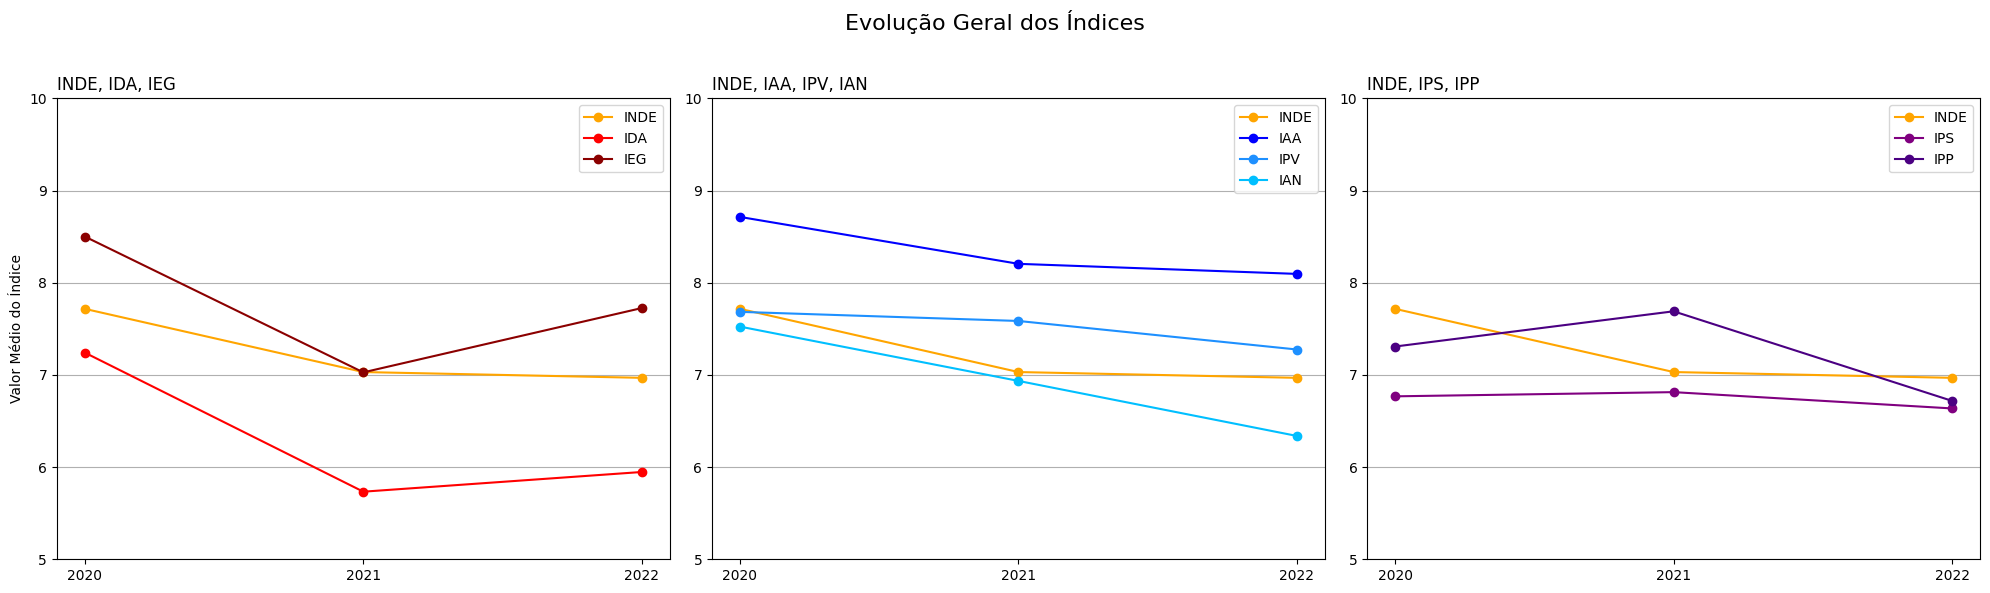

In [42]:
# Configurando a figura com 3 subplots
plt.figure(figsize=(20, 6))

# Subplot 1: INDE, IDA, IEG (Verde e tons de vermelho)
plt.subplot(1, 3, 1)
plt.plot(df_result.index, df_result['INDE'], marker='o', color='orange', label='INDE')
plt.plot(df_result.index, df_result['IDA'], marker='o', color='red', label='IDA')
plt.plot(df_result.index, df_result['IEG'], marker='o', color='darkred', label='IEG')
plt.title('INDE, IDA, IEG', loc='left')
plt.ylabel('Valor Médio do Índice')
plt.xticks(df_result.index)
plt.ylim(5, 10) 
plt.legend()
plt.grid(axis='y')

# Subplot 2: INDE, IAA, IPV, IAN (Verde e tons de azul)
plt.subplot(1,3, 2)
plt.plot(df_result.index, df_result['INDE'], marker='o', color='orange', label='INDE')
plt.plot(df_result.index, df_result['IAA'], marker='o', color='blue', label='IAA')
plt.plot(df_result.index, df_result['IPV'], marker='o', color='dodgerblue', label='IPV')
plt.plot(df_result.index, df_result['IAN'], marker='o', color='deepskyblue', label='IAN')
plt.title('INDE, IAA, IPV, IAN', loc='left')
# plt.ylabel('Valor Médio')
plt.xticks(df_result.index)
plt.ylim(5, 10) 
plt.legend()
plt.grid(axis='y')

# Subplot 3: INDE, IPS, IPP (Verde e tons de roxo)
plt.subplot(1,3, 3)
plt.plot(df_result.index, df_result['INDE'], marker='o', color='orange', label='INDE')
plt.plot(df_result.index, df_result['IPS'], marker='o', color='purple', label='IPS')
plt.plot(df_result.index, df_result['IPP'], marker='o', color='indigo', label='IPP')
plt.title('INDE, IPS, IPP', loc='left')
# plt.ylabel('Valor Médio')
plt.xticks(df_result.index)
plt.ylim(5, 10) 
plt.legend()
plt.grid(axis='y')


plt.suptitle('Evolução Geral dos Índices', fontsize=16)

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Exibindo o gráfico
plt.show()

In [43]:
def plota_indices(result,title):
    # Configurando a figura com 3 subplots
    plt.figure(figsize=(20, 4))

    # Subplot 1: INDE, IDA, IEG (Verde e tons de vermelho)
    plt.subplot(1, 3, 1)
    plt.plot(result.index, result['INDE'], marker='o', color='orange', label='INDE')
    plt.plot(result.index, result['IDA'], marker='o', color='red', label='IDA')
    plt.plot(result.index, result['IEG'], marker='o', color='darkred', label='IEG')
    plt.title('INDE, IDA, IEG', loc='left')
    plt.ylabel('Valor Médio do Índice')
    plt.xticks(result.index)
    plt.ylim(5, 10) 
    plt.legend()
    plt.grid(axis='y')

    # Subplot 2: INDE, IAA, IPV, IAN (Verde e tons de azul)
    plt.subplot(1,3, 2)
    plt.plot(result.index, result['INDE'], marker='o', color='orange', label='INDE')
    plt.plot(result.index, result['IAA'], marker='o', color='blue', label='IAA')
    plt.plot(result.index, result['IPV'], marker='o', color='dodgerblue', label='IPV')
    plt.plot(result.index, result['IAN'], marker='o', color='deepskyblue', label='IAN')
    plt.title('INDE, IAA, IPV, IAN', loc='left')
    # plt.ylabel('Valor Médio')
    plt.xticks(result.index)
    plt.ylim(5, 10) 
    plt.legend()
    plt.grid(axis='y')

    # Subplot 3: INDE, IPS, IPP (Verde e tons de roxo)
    plt.subplot(1,3, 3)
    plt.plot(result.index, result['INDE'], marker='o', color='orange', label='INDE')
    plt.plot(result.index, result['IPS'], marker='o', color='purple', label='IPS')
    plt.plot(result.index, result['IPP'], marker='o', color='indigo', label='IPP')
    plt.title('INDE, IPS, IPP', loc='left')
    # plt.ylabel('Valor Médio')
    plt.xticks(result.index)
    plt.ylim(5, 10) 
    plt.legend()
    plt.grid(axis='y')


    plt.suptitle(title, fontsize=16)

    # Ajustando o layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Exibindo o gráfico
    plt.show()

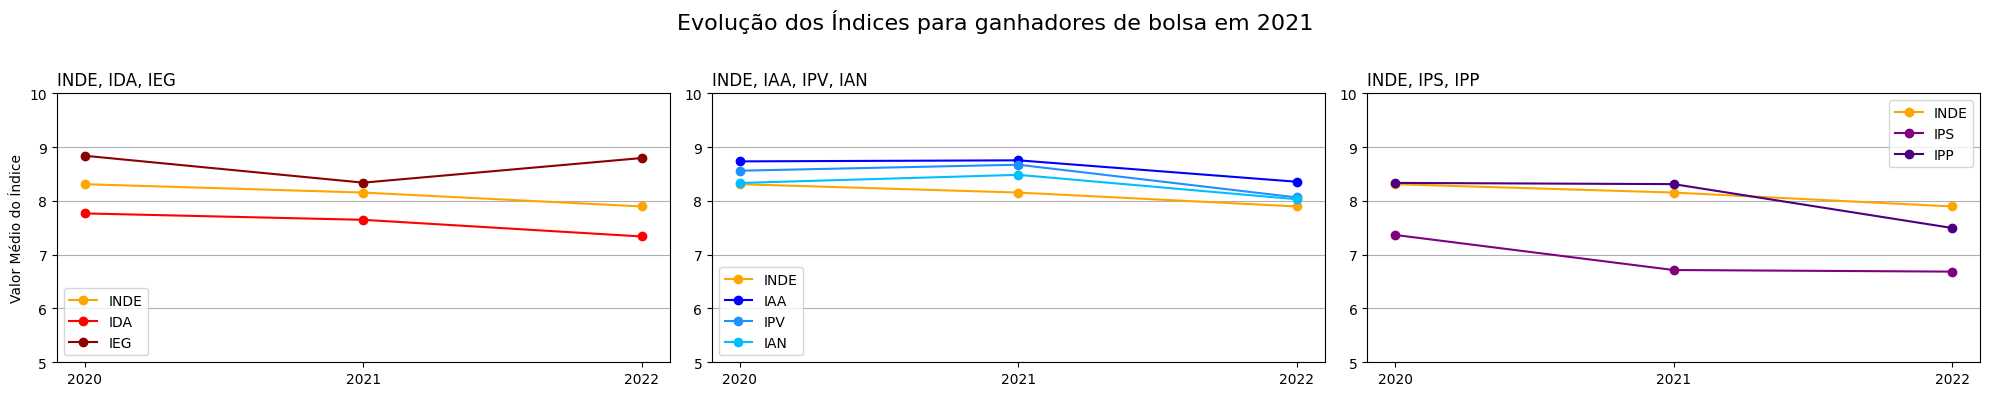

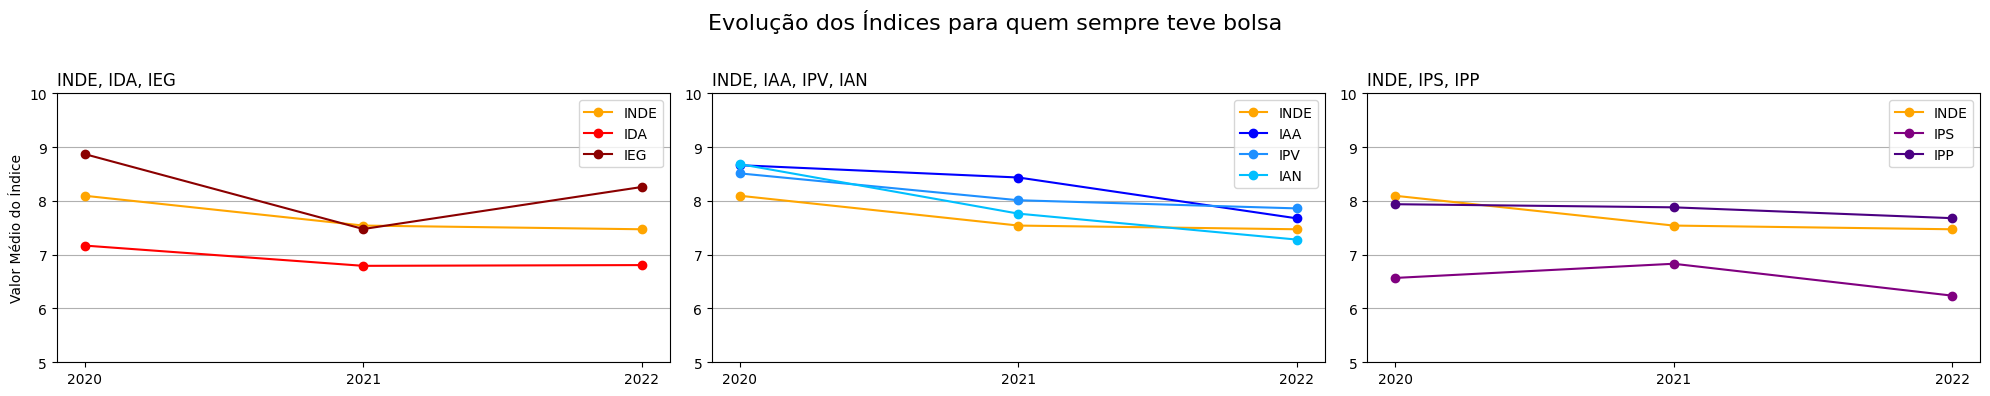

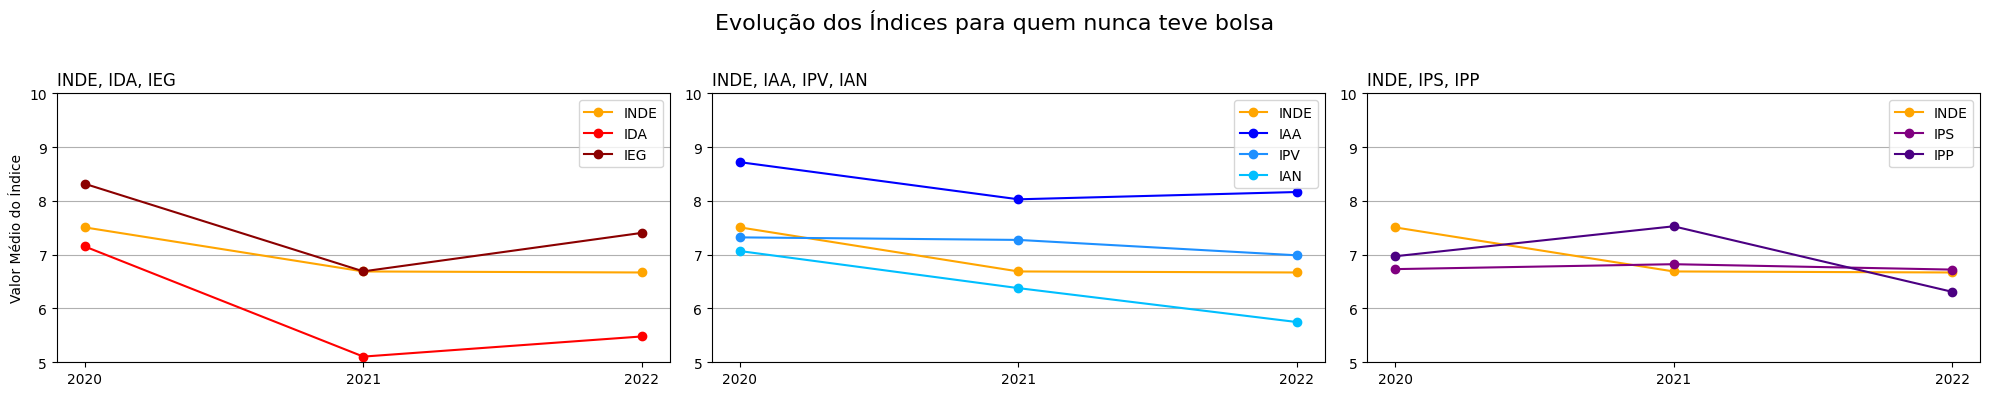

In [44]:
plota_indices(df_resultG,'Evolução dos Índices para ganhadores de bolsa em 2021')
plota_indices(df_resultS,'Evolução dos Índices para quem sempre teve bolsa')
plota_indices(df_resultN,'Evolução dos Índices para quem nunca teve bolsa')

## Avaliação dos alunos que saíram da PM

In [45]:
df_churn = df.copy()

### Feature Engineering

In [46]:
df_churn['Saída_2021'] = df_churn.apply(lambda row: 
                                         1 if pd.notna(row['FASE_2020']) and pd.isna(row['FASE_2021']) and pd.isna(row['FASE_2022']) else 
                                         (0 if pd.notna(row['FASE_2020']) and pd.notna(row['FASE_2021']) else np.nan), axis=1)
df_churn['Saída_2021'].value_counts()

Saída_2021
0.0    457
1.0    233
Name: count, dtype: int64

In [47]:
df_churn['Saída_2022'] = df_churn.apply(lambda row: 
                                         1 if  pd.notna(row['FASE_2021']) and pd.isna(row['FASE_2022']) else 
                                         (0 if pd.notna(row['FASE_2021']) and pd.notna(row['FASE_2022']) else np.nan), axis=1)
df_churn['Saída_2022'].value_counts()

Saída_2022
0.0    457
1.0    229
Name: count, dtype: int64

In [48]:
df_saida_21 = df_churn[['NOME','INDE_2020', 'IDA_2020', 'IEG_2020', 'IAA_2020', 'IAN_2020','IPV_2020', 'IPS_2020', 'IPP_2020','Saída_2021']]
df_saida_22 = df_churn[['NOME','INDE_2021', 'IDA_2021', 'IEG_2021', 'IAA_2021', 'IAN_2021','IPV_2021', 'IPS_2021', 'IPP_2021', 'Saída_2022']]

df_saida_21.columns = [col.replace('_2020', '') for col in df_saida_21.columns]
df_saida_21.rename(columns={'Saída_2021':'Saída'}, inplace=True)
df_saida_22.columns = [col.replace('_2021', '') for col in df_saida_22.columns]
df_saida_22.rename(columns={'Saída_2022':'Saída'}, inplace=True)

df_saida_21.dropna(inplace=True)
df_saida_22.dropna(inplace=True)

df_saida = pd.concat([df_saida_21, df_saida_22], ignore_index=True)
df_saida

,NOME,INDE,IDA,IEG,IAA,IAN,IPV,IPS,IPP,Saída
0,ALUNO-1,7.883752,7.000000,8.7,8.50002,10.0,7.750000,7.500,5.93750,0.0
1,ALUNO-3,7.856390,5.500000,8.9,7.91667,10.0,8.111113,7.500,8.12500,0.0
2,ALUNO-5,8.077085,7.500000,8.0,7.50002,10.0,8.166665,7.500,8.43750,0.0
3,ALUNO-8,8.381391,7.333333,9.9,8.33334,10.0,8.944450,4.375,8.75000,0.0
4,ALUNO-10,5.161874,0.000000,5.2,5.83333,10.0,6.833333,3.750,7.96875,1.0
...,...,...,...,...,...,...,...,...,...,...
1369,ALUNO-1338,6.511000,5.200000,2.1,7.90000,10.0,8.700000,7.500,7.70000,0.0
1370,ALUNO-1343,3.996000,1.300000,1.3,10.00000,5.0,3.700000,5.600,6.90000,0.0
1371,ALUNO-1344,5.664000,2.000000,5.8,9.50000,2.5,7.600000,5.600,8.10000,1.0
1372,ALUNO-1345,6.606000,4.900000,6.7,9.00000,5.0,7.100000,7.500,7.20000,1.0


##### Testes para conferir a lógica

In [49]:
df_saida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NOME    1374 non-null   object 
 1   INDE    1374 non-null   float64
 2   IDA     1374 non-null   float64
 3   IEG     1374 non-null   float64
 4   IAA     1374 non-null   float64
 5   IAN     1374 non-null   float64
 6   IPV     1374 non-null   float64
 7   IPS     1374 non-null   float64
 8   IPP     1374 non-null   float64
 9   Saída   1374 non-null   float64
dtypes: float64(9), object(1)
memory usage: 107.5+ KB


In [50]:
df_saida[['NOME']].duplicated().sum()
# 455 alunos aparecem 2x, uma com indicadores de 2020 e outra com indicadores de 2021
# Obs.: 457 deveriam aparecer 2x, mas 2 alunos estavam com INDE nulo em 2022.

np.int64(455)

In [51]:
# Não saíram em 2021
df_churn.loc[
    (df_churn['FASE_2020'].notna()) & 
    (df_churn['FASE_2021'].notna())# & 
    # (df_churn['FASE_2022'].notna())
].shape

(457, 53)

In [52]:
# Não saíram em 2022
df_churn.loc[
    # (df_churn['FASE_2020'].notna()) & 
    (df_churn['FASE_2021'].notna()) & 
    (df_churn['FASE_2022'].notna())
].shape

(457, 53)

In [53]:
df_saida_21.shape[0]+df_saida_22.shape[0]

1374

### Análise de correlação

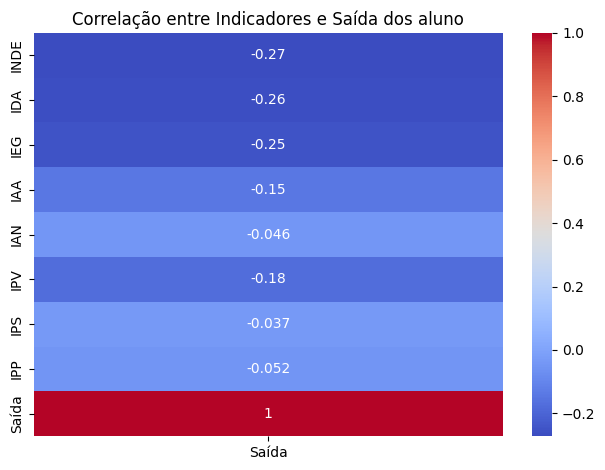

In [54]:
matriz_corr = df_saida.corr(numeric_only=True)

sns.heatmap(matriz_corr[['Saída']], annot=True, cmap='coolwarm')
plt.title('Correlação entre Indicadores e Saída dos aluno')
# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Apesar da correlação ser fraca, as correlações do INDE, IDA e IEG são mais expressivas que as demais

In [55]:
# Filtrando apenas indicadores mais expressivos
indicadores = df_saida[['IDA','IEG', 'INDE']]
# indicadores =  indicadores.dropna(subset=['IDA'])
indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IDA     1374 non-null   float64
 1   IEG     1374 non-null   float64
 2   INDE    1374 non-null   float64
dtypes: float64(3)
memory usage: 32.3 KB


### Machine Learning

In [56]:
# Definindo as variáveis explicativas (indicadores) e a variável-alvo (Saída)
X = indicadores  
y = df_saida['Saída']  

# Dividindo o dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [57]:
y_train.value_counts()

Saída
0.0    727
1.0    372
Name: count, dtype: int64

In [58]:
# Balanceamento das classes
smote = SMOTE(random_state=31)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [59]:
y_train_resampled.value_counts()

Saída
0.0    727
1.0    727
Name: count, dtype: int64

NOTA! Não precisa normalizar porque todos os indicadores são de 0 a 10

#### Árvore de decisão

Acurácia: 0.57

Matriz de Confusão:
[[105  82]
 [ 35  53]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.75      0.56      0.64       187
         1.0       0.39      0.60      0.48        88

    accuracy                           0.57       275
   macro avg       0.57      0.58      0.56       275
weighted avg       0.64      0.57      0.59       275



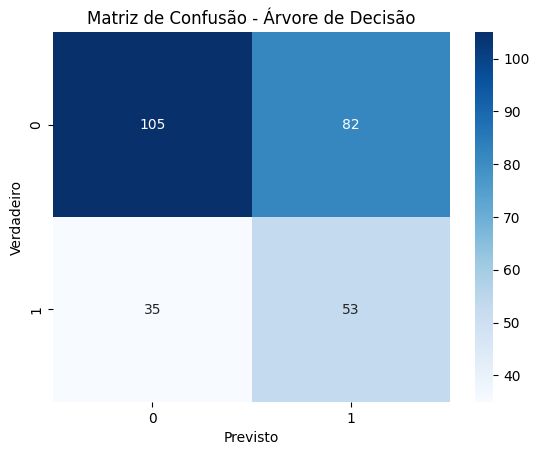

In [60]:
clf = DecisionTreeClassifier(random_state=31)
clf.fit(X_train_resampled, y_train_resampled)
# Fazendo previsões
y_pred_DT = clf.predict(X_test)

# Avaliando o desempenho do modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred_DT):.2f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_DT))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_DT))

# Exibir matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_DT),annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

#### Regressão logística

In [61]:
X_test

,IDA,IEG,INDE
50,6.000000,8.0,7.393752
361,9.500000,9.9,7.730002
377,9.000000,8.2,8.431669
1081,3.900000,7.9,6.506000
793,7.500000,9.4,8.761000
...,...,...,...
655,10.000000,10.0,7.316670
1301,1.900000,2.5,4.615000
1074,4.300000,3.8,5.500000
315,8.000000,7.1,7.342223


Acurácia: 0.62

Matriz de Confusão:
[[115  72]
 [ 32  56]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.69       187
         1.0       0.44      0.64      0.52        88

    accuracy                           0.62       275
   macro avg       0.61      0.63      0.60       275
weighted avg       0.67      0.62      0.63       275



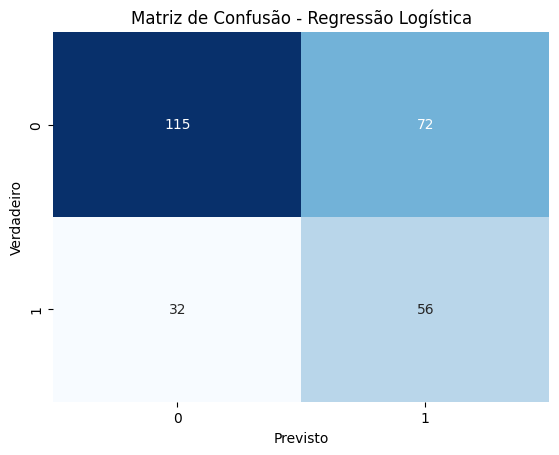

In [62]:
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões
y_pred_LR = log_model.predict(X_test)

# Avaliar o modelo com a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_LR)
accuracy = accuracy_score(y_test, y_pred_LR)

# Avaliando o desempenho do modelo
print(f"Acurácia: {accuracy:.2f}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_LR))

# Exibir matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

In [63]:
X_test

,IDA,IEG,INDE
50,6.000000,8.0,7.393752
361,9.500000,9.9,7.730002
377,9.000000,8.2,8.431669
1081,3.900000,7.9,6.506000
793,7.500000,9.4,8.761000
...,...,...,...
655,10.000000,10.0,7.316670
1301,1.900000,2.5,4.615000
1074,4.300000,3.8,5.500000
315,8.000000,7.1,7.342223


In [64]:
y_pred_LR

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.

In [65]:
np.array(y_test)

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0.

Regressão logística foi melhor

In [66]:
# Salvando o modelo
with open('pred_evasao.pkl','wb') as file:
    pickle.dump(log_model, file)

Acurácia: 0.62

Matriz de Confusão:
[[115  72]
 [ 32  56]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.69       187
         1.0       0.44      0.64      0.52        88

    accuracy                           0.62       275
   macro avg       0.61      0.63      0.60       275
weighted avg       0.67      0.62      0.63       275



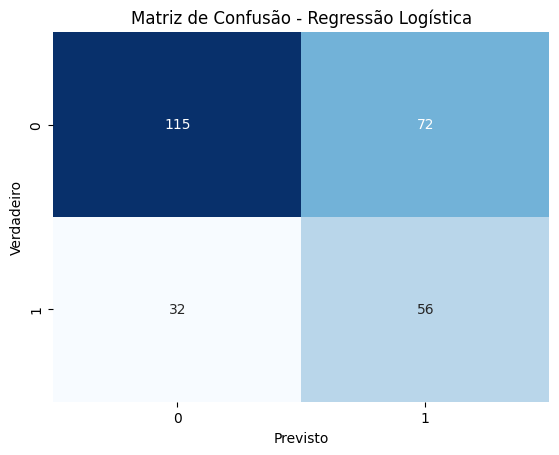

In [67]:
# Testando o artefato criado
# Carregando

with open('pred_evasao.pkl','rb') as file_2:
    modelo_art = pickle.load(file_2)
    # df=pickle.load(open('df.p','rb'))

prev = modelo_art.predict(X_test)

# Avaliar o modelo com a matriz de confusão
conf_matrix = confusion_matrix(y_test, prev)
accuracy = accuracy_score(y_test, prev)

# Avaliando o desempenho do modelo
print(f"Acurácia: {accuracy:.2f}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(classification_report(y_test, prev))

# Exibir matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

ok

In [68]:
X

,IDA,IEG,INDE
0,7.000000,8.7,7.883752
1,5.500000,8.9,7.856390
2,7.500000,8.0,8.077085
3,7.333333,9.9,8.381391
4,0.000000,5.2,5.161874
...,...,...,...
1369,5.200000,2.1,6.511000
1370,1.300000,1.3,3.996000
1371,2.000000,5.8,5.664000
1372,4.900000,6.7,6.606000


In [73]:
# Testes para quem entrou em 2022
df_churn.loc[
    (df_churn['FASE_2020'].isna()) & 
    (df_churn['FASE_2021'].isna()) & 
    (df_churn['FASE_2022'].notna())
].shape

(392, 53)

In [70]:
X_2022 = df_churn.loc[
    (df_churn['FASE_2020'].isna()) & 
    (df_churn['FASE_2021'].isna()) & 
    (df_churn['FASE_2022'].notna())
]
X_2022 = X_2022[['IDA_2022','IEG_2022','INDE_2022']]
X_2022.rename(columns={'IDA_2022':'IDA','IEG_2022':'IEG','INDE_2022':'INDE'}, inplace=True)
X_2022

,IDA,IEG,INDE
1,8.816667,7.581705,7.675509
5,5.500000,9.333333,7.741669
6,5.583333,9.314954,7.406743
8,2.133333,6.820378,5.665746
15,6.333333,9.338624,6.995504
...,...,...,...
1336,6.500000,5.212121,6.150757
1339,0.000000,5.773810,5.030804
1341,7.750000,9.666667,8.150001
1345,9.000000,9.031839,8.135538


In [72]:
prev_22 = modelo_art.predict(X_2022)
prev_22

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0.